# Analisis dan Prediksi Harga Buka Saham IBM rentang waktu 1 Januari 2006 - 1 januari 2018

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Melakukan importing beberapa libarary yang digunakan  
pandas (dataframe management)  
numpy (advanced mathematic)  
matplotlib (plotting data)  

In [2]:
df = pd.read_csv("IBM.csv")

membuka dataset

In [3]:
null_columns=df.columns[df.isnull().any()]
print(df[df["Open"].isnull()][null_columns])

      Open  Low
2913   NaN  NaN


mencari NaN pada dataset

In [4]:
df = df.drop([2913])
df.reset_index(drop=True,inplace=True)

melakukan dropping pada NaN Value pada dataset

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
1,2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2,2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
3,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
4,2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


melihat kondisi dataset

In [6]:
dataPakai = df.iloc[:,1:2].values

Melakukan Pengambilan Kolom Nilai harga Buka Saham IBM

In [7]:
dataTrain = dataPakai[:len(dataPakai)-50,0]

Membagi 2 data yang digunakan untuk training dan test

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
dataTrain_scaled = dataTrain.reshape(-1,1)
dataTrain_scaled = sc.fit_transform(dataTrain_scaled)

Melakukan Scaling 0 - 1 pada dataset

In [11]:
x_train = []
y_train = []
for i in range(120,len(dataTrain_scaled)):
    x_train.append(dataTrain_scaled[i-120:i,0])
    y_train.append(dataTrain_scaled[i,0])

Membagi dataTrain yang sudah di scaling menjadi Input Time Series, dan Output. Pada program ini, output akan dianalisa menggunakan 120 data sebelum output.

In [12]:
x_train,y_train = np.array(x_train),np.array(y_train)

mengubah list x_train dan y_train menjadi numpy array

In [13]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

melakukan reshaping pada x_train menjadi 3 dimensi yang akan digunakan sebagai input dari RNN

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

Melakukan importing untuk library keras yang akan digunakan dalam pembuatan architectur RNN  
Dense digunakan untuk membuat neuron  
LSTM digunakan untuk membuat neuron Long short-term memory  
Droput digunakan untuk mengurangi overfitting pada model  

In [15]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences=True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

membuat architectur RNN dengan LSTM 4 Stack pada masing-masing stack terdapat 50 Neurons. pada tahap ini digunakan output sebanyak 1 neuron karena hasil yang diinginkan adalah nilai regresi. Pada architecture ini akan di lakukan dropout sebanyak 20% dari 50 neurons pada stack, sehingga dengan demikian nilai dari 10 neurons acak akan diabaikan dalam melakukan back propagation. 

In [16]:
regressor.compile(optimizer="adam",loss="mean_squared_error")

melakukan compile pada model RNN

In [17]:
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Train on 2849 samples
Epoch 1/100
2849/2849 [==============================] - 23s 8ms/sample - loss: 0.0308
Epoch 2/100
2849/2849 [==============================] - 4s 2ms/sample - loss: 0.0055 1s 
Epoch 3/100
2849/2849 [==============================] - 4s 1ms/sample - loss: 0.0051
Epoch 4/100
2849/2849 [==============================] - 4s 1ms/sample - loss: 0.0083
Epoch 5/100
2849/2849 [==============================] - 4s 1ms/sample - loss: 0.0045: 1s - loss: 0. - ETA: 0s - lo
Epoch 6/100
2849/2849 [==============================] - 4s 2ms/sample - loss: 0.0048
Epoch 7/100
2849/2849 [==============================] - 4s 1ms/sample - loss: 0.0039
Epoch 8/100
2849/2849 [==============================] - 4s 1ms/sample - loss: 0.0039 0s - loss: 0.0
Epoch 9/100
2849/2849 [==============================] - 4s 1ms/sample - loss: 0.0038 0s - loss
Epoch 10/100
2849/2849 [==============================] - 4s 1ms/sample - loss: 0.0034
Epoch 11/100
2849/2849 [==============================] -

2849/2849 [==============================] - 4s 1ms/sample - loss: 9.1409e-04 2s - loss: 9.833 - E
Epoch 87/100
2849/2849 [==============================] - 4s 1ms/sample - loss: 8.5220e-04 2s - loss: 8 - ET
Epoch 88/100
2849/2849 [==============================] - 4s 1ms/sample - loss: 9.7139e-04 1s - loss: 9.50 - ETA: 0s - loss:
Epoch 89/100
2849/2849 [==============================] - 4s 1ms/sample - loss: 8.2225e-04
Epoch 90/100
2849/2849 [==============================] - 4s 1ms/sample - loss: 9.0150e-04 1s - loss: 8.8568e - ETA: 1s - loss: 8.8 - ETA: 0s - loss:
Epoch 91/100
2849/2849 [==============================] - 4s 1ms/sample - loss: 9.6238e-04
Epoch 92/100
2849/2849 [==============================] - 4s 1ms/sample - loss: 0.0013- ETA: 1
Epoch 93/100
2849/2849 [==============================] - 4s 2ms/sample - loss: 0.0010
Epoch 94/100
2849/2849 [==============================] - 4s 1ms/sample - loss: 9.4178e-04- - ETA: 2s - loss - ETA: 1
Epoch 95/100
2849/2849 [===========

melakukan training pada data menggunakan model yang sudah dibuat

In [42]:
dataTest = dataPakai[len(dataPakai)-50-120:,0]
dataTest1 = dataPakai[len(dataPakai)-50:,0]
dataTest = dataTest.reshape(-1,1)
dataTest = sc.transform(dataTest)

mempersiapkan data Testing untuk mengecek model yang telah dibuat

In [43]:
x_test=[]
for i in range(120,170):
    x_test.append(dataTest[i-120:i,0])

membuat list untuk data time series yang akan diprediksi, time series sebanyak 120 data (120 hari)

In [44]:
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

melakukan reshaping pada x_test dalam bentuk 3 Dimensi array sesuai dengan input pada model

In [45]:
prediksi = regressor.predict(x_test)
prediksi = sc.inverse_transform(prediksi)

melakukan prediksi data test menggunakan model RNN yang sudah dibuat

[]

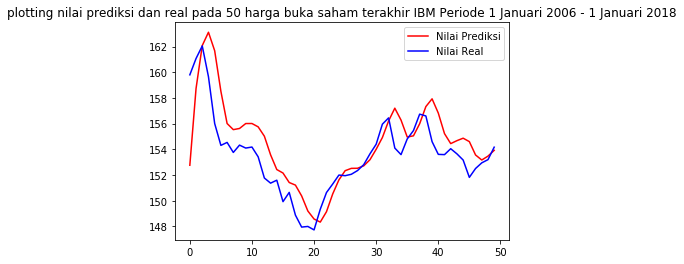

In [46]:
plt.plot(prediksi,"r",label="Nilai Prediksi")
plt.plot(dataTest1,"b",label="Nilai Real")
plt.legend()
plt.title("plotting nilai prediksi dan real pada 50 harga buka saham terakhir IBM Periode 1 Januari 2006 - 1 Januari 2018")
plt.plot()